<!-- meta data for latex export -->
\setcounter{page}{0}
\title{Fixed Income Derivatives: Risk Management and Financial
Institutions \\ Exam February 2024}
\author{Johan Ølgaard}
\date{January 17, 2025}
\maketitle
\setcounter{secnumdepth}{0}

In [1]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
import numpy as np
from scipy.optimize import minimize

import sys
import os
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid
import plotting as plot

%load_ext autoreload
%autoreload 2

### Problem 1
#### a)

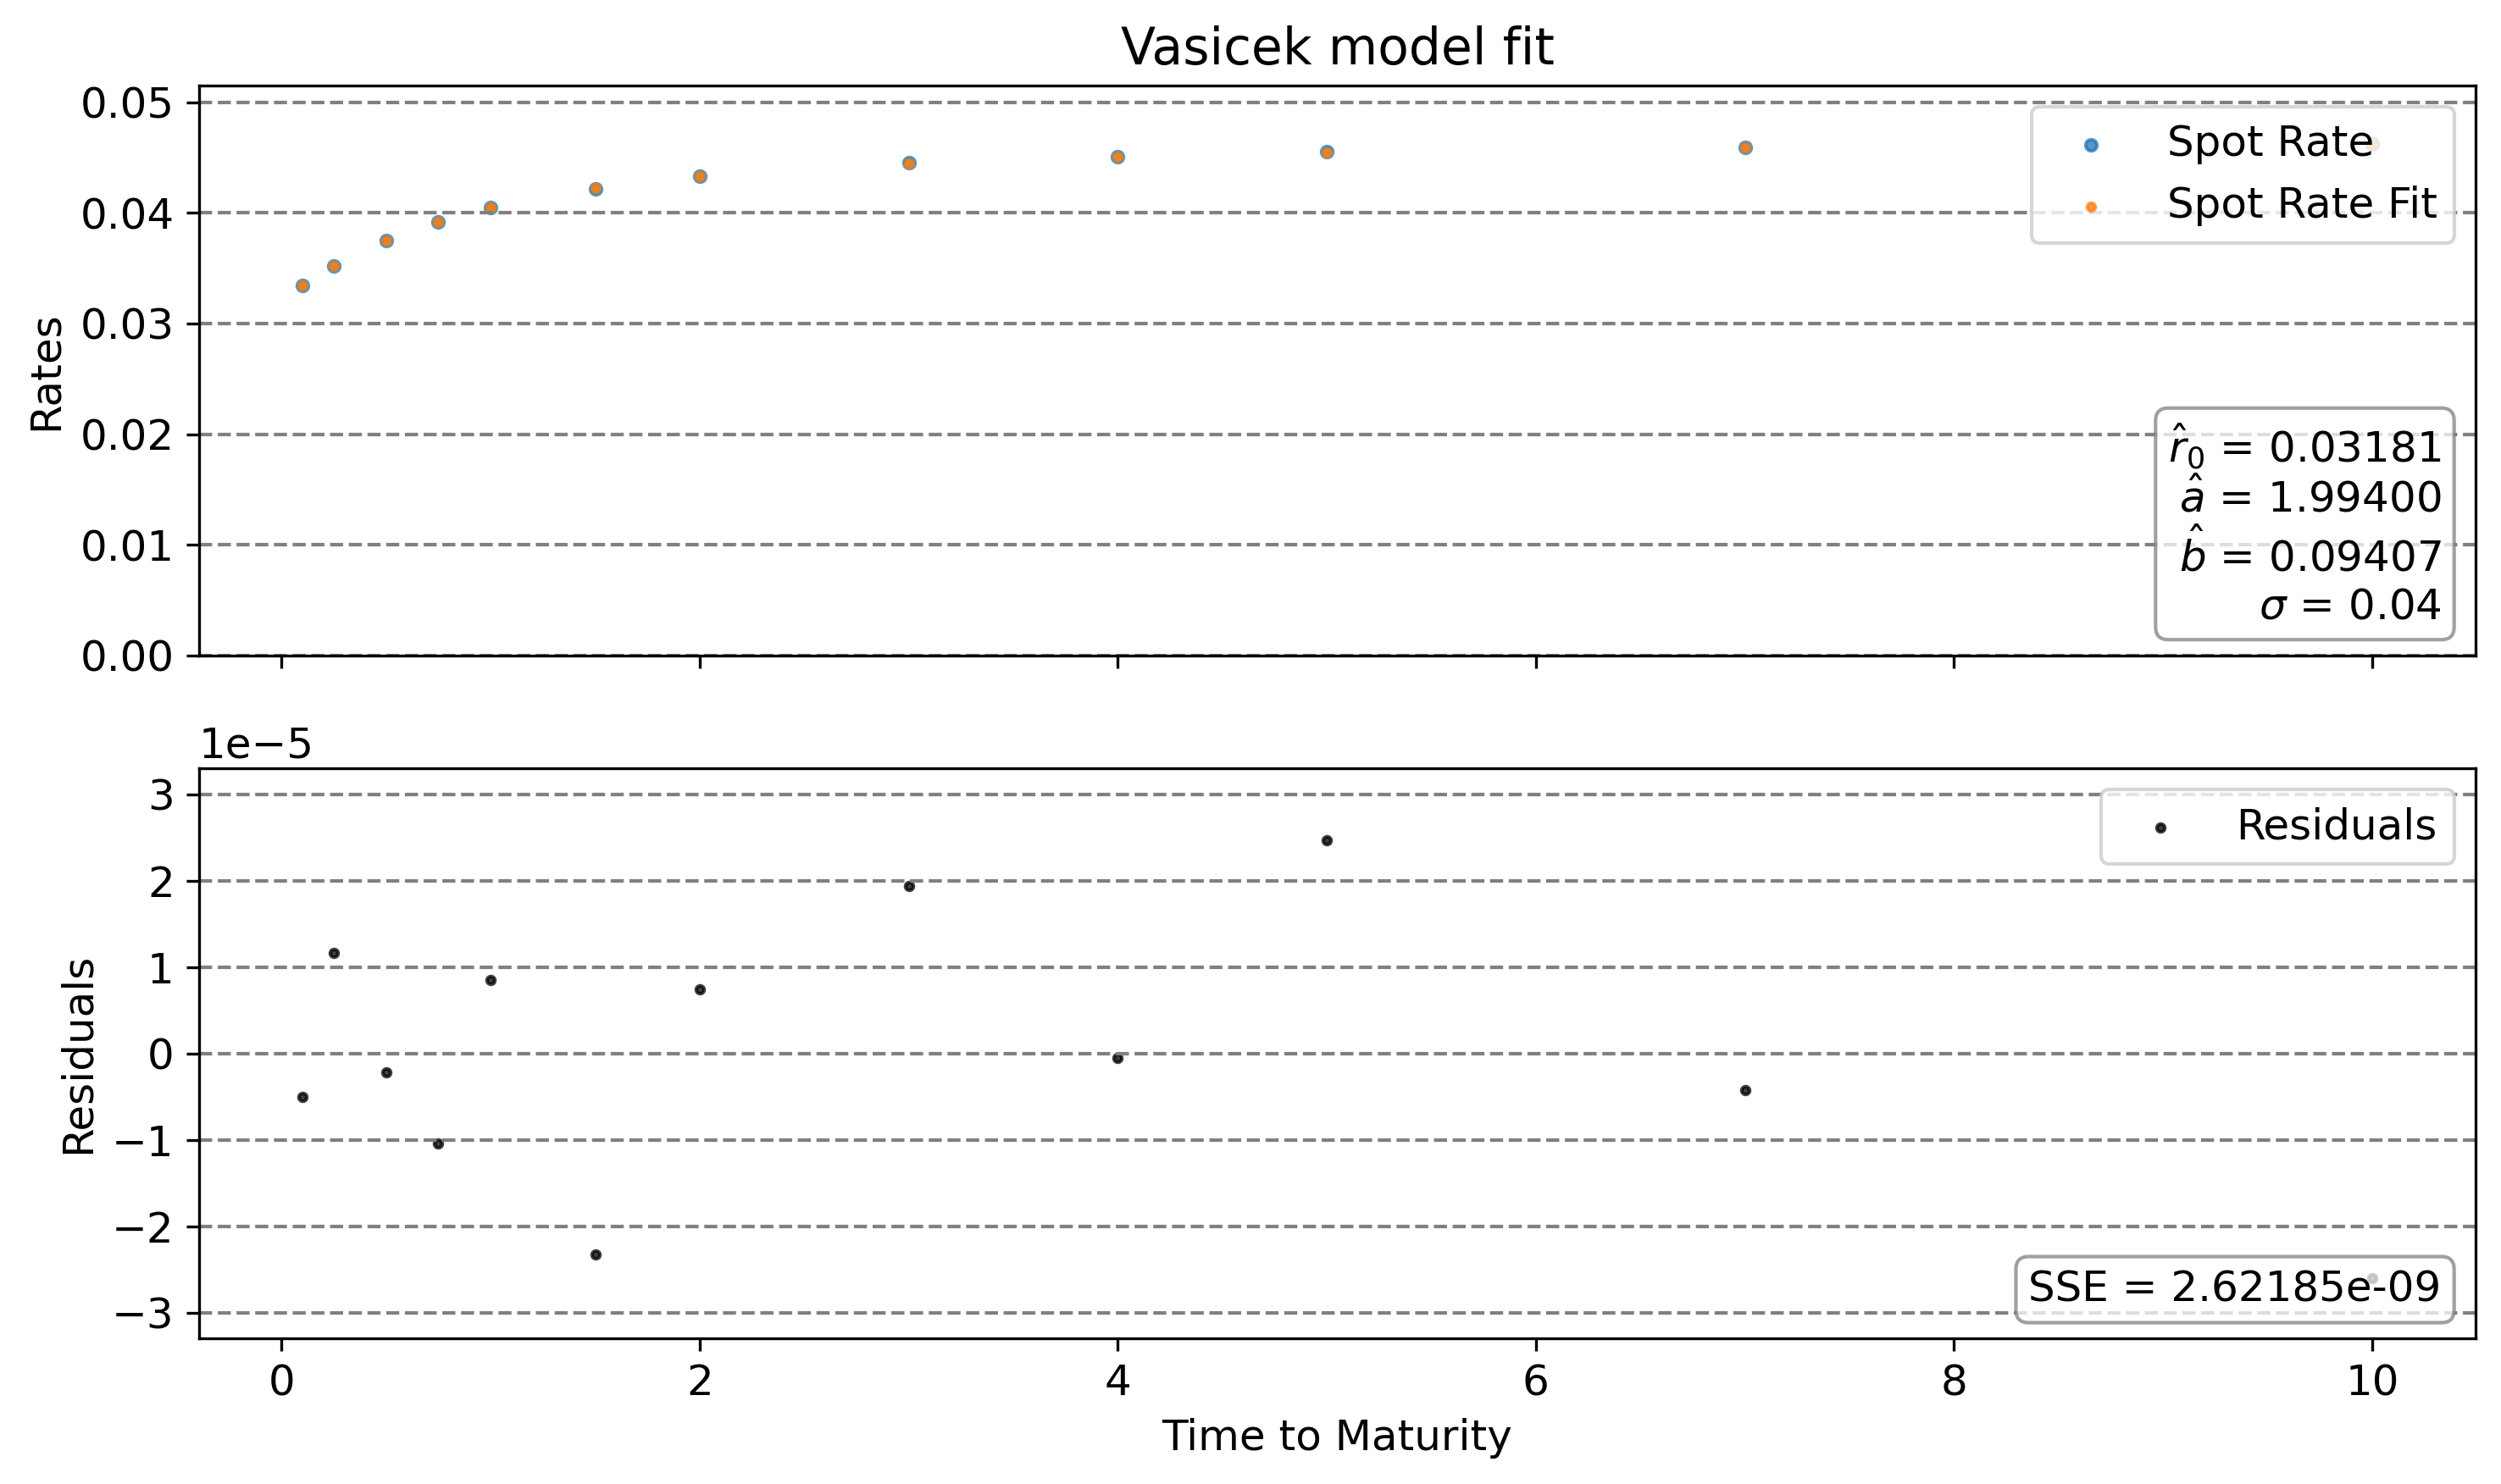

In [36]:
T = np.array([0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10])
R = np.array([0.0334, 0.0352, 0.0375, 0.0392, 0.0405, 0.0422, 0.0433, 0.0445, 0.0451, 0.0455, 0.0459, 0.0462])
# R = np.array([0.0352, 0.0361, 0.0374, 0.0387, 0.0397, 0.0415, 0.0429, 0.0449, 0.0462, 0.0471, 0.0483, 0.0492])
sigma = 0.04
param0 = 0.038, 1.2, 0.07
result = minimize(fid.fit_vasicek_no_sigma_obj, param0, args=(sigma, R, T), method='nelder-mead', options={'xatol': 1e-12, 'disp': False})
r0, a, b = result.x
R_fit = fid.spot_rate_vasicek(r0,a,b,sigma, T)
residuals = R - R_fit
fit = [{'label':'Spot Rate','x':T,'y':R,'s':40},
       {'label':'Spot Rate Fit','x':T,'y':R_fit}]
res = [{'label':'Residuals','x':T,'y':residuals}]
text = {'$\hat{r}_0$':r0,'$\hat{a}$':a,'$\hat{b}$':b,'$\sigma$':f'{sigma:.2f}'}
text_res = {'SSE':result.fun}
plot.fit(fit,res,'Vasicek model fit',text,text_res)

From the plot above we see that the fitted spot rate is on top of the actual spot rate with an SSE of $2.62\cdot 10^{-9}$.

#### b)

In [37]:
alpha = 0.5
T = np.linspace(0,6,13)
p = fid.zcb_price_vasicek(r0,a,b,sigma,T)
L = fid.forward_libor_rates_from_zcb_prices(T,p)
R_swap, S_swap = fid.swap_rate_from_zcb_prices(0,0,int(T[-1]),'semiannual',T,p)
print(f'proposed 6Y swap rate: {R_swap:.4f}')
price_caplet = fid.caplet_prices_vasicek(sigma,R_swap,a,T,p)
price_cap = sum(price_caplet)
print(f"Price of the interest rate cap: {price_cap*10000} bps, semiannual premium: {alpha*price_cap/S_swap*10000:.5f} bps")

proposed 6Y swap rate: 0.0461
Price of the interest rate cap: 263.791233231834 bps, semiannual premium: 25.34276 bps


#### c)
In an arbitrage-free market, the swap and cap offer distinct protections without price discrepancies. The payer swap locks in fixed payments, eliminating any upside or downside from rate movements, while the cap allows the client to benefit if rates decrease but limits losses if rates rise above the strike. The cap’s cost appropriately reflects its optionality, ensuring no arbitrage opportunities between the two methods.

### Problem 3
#### a)

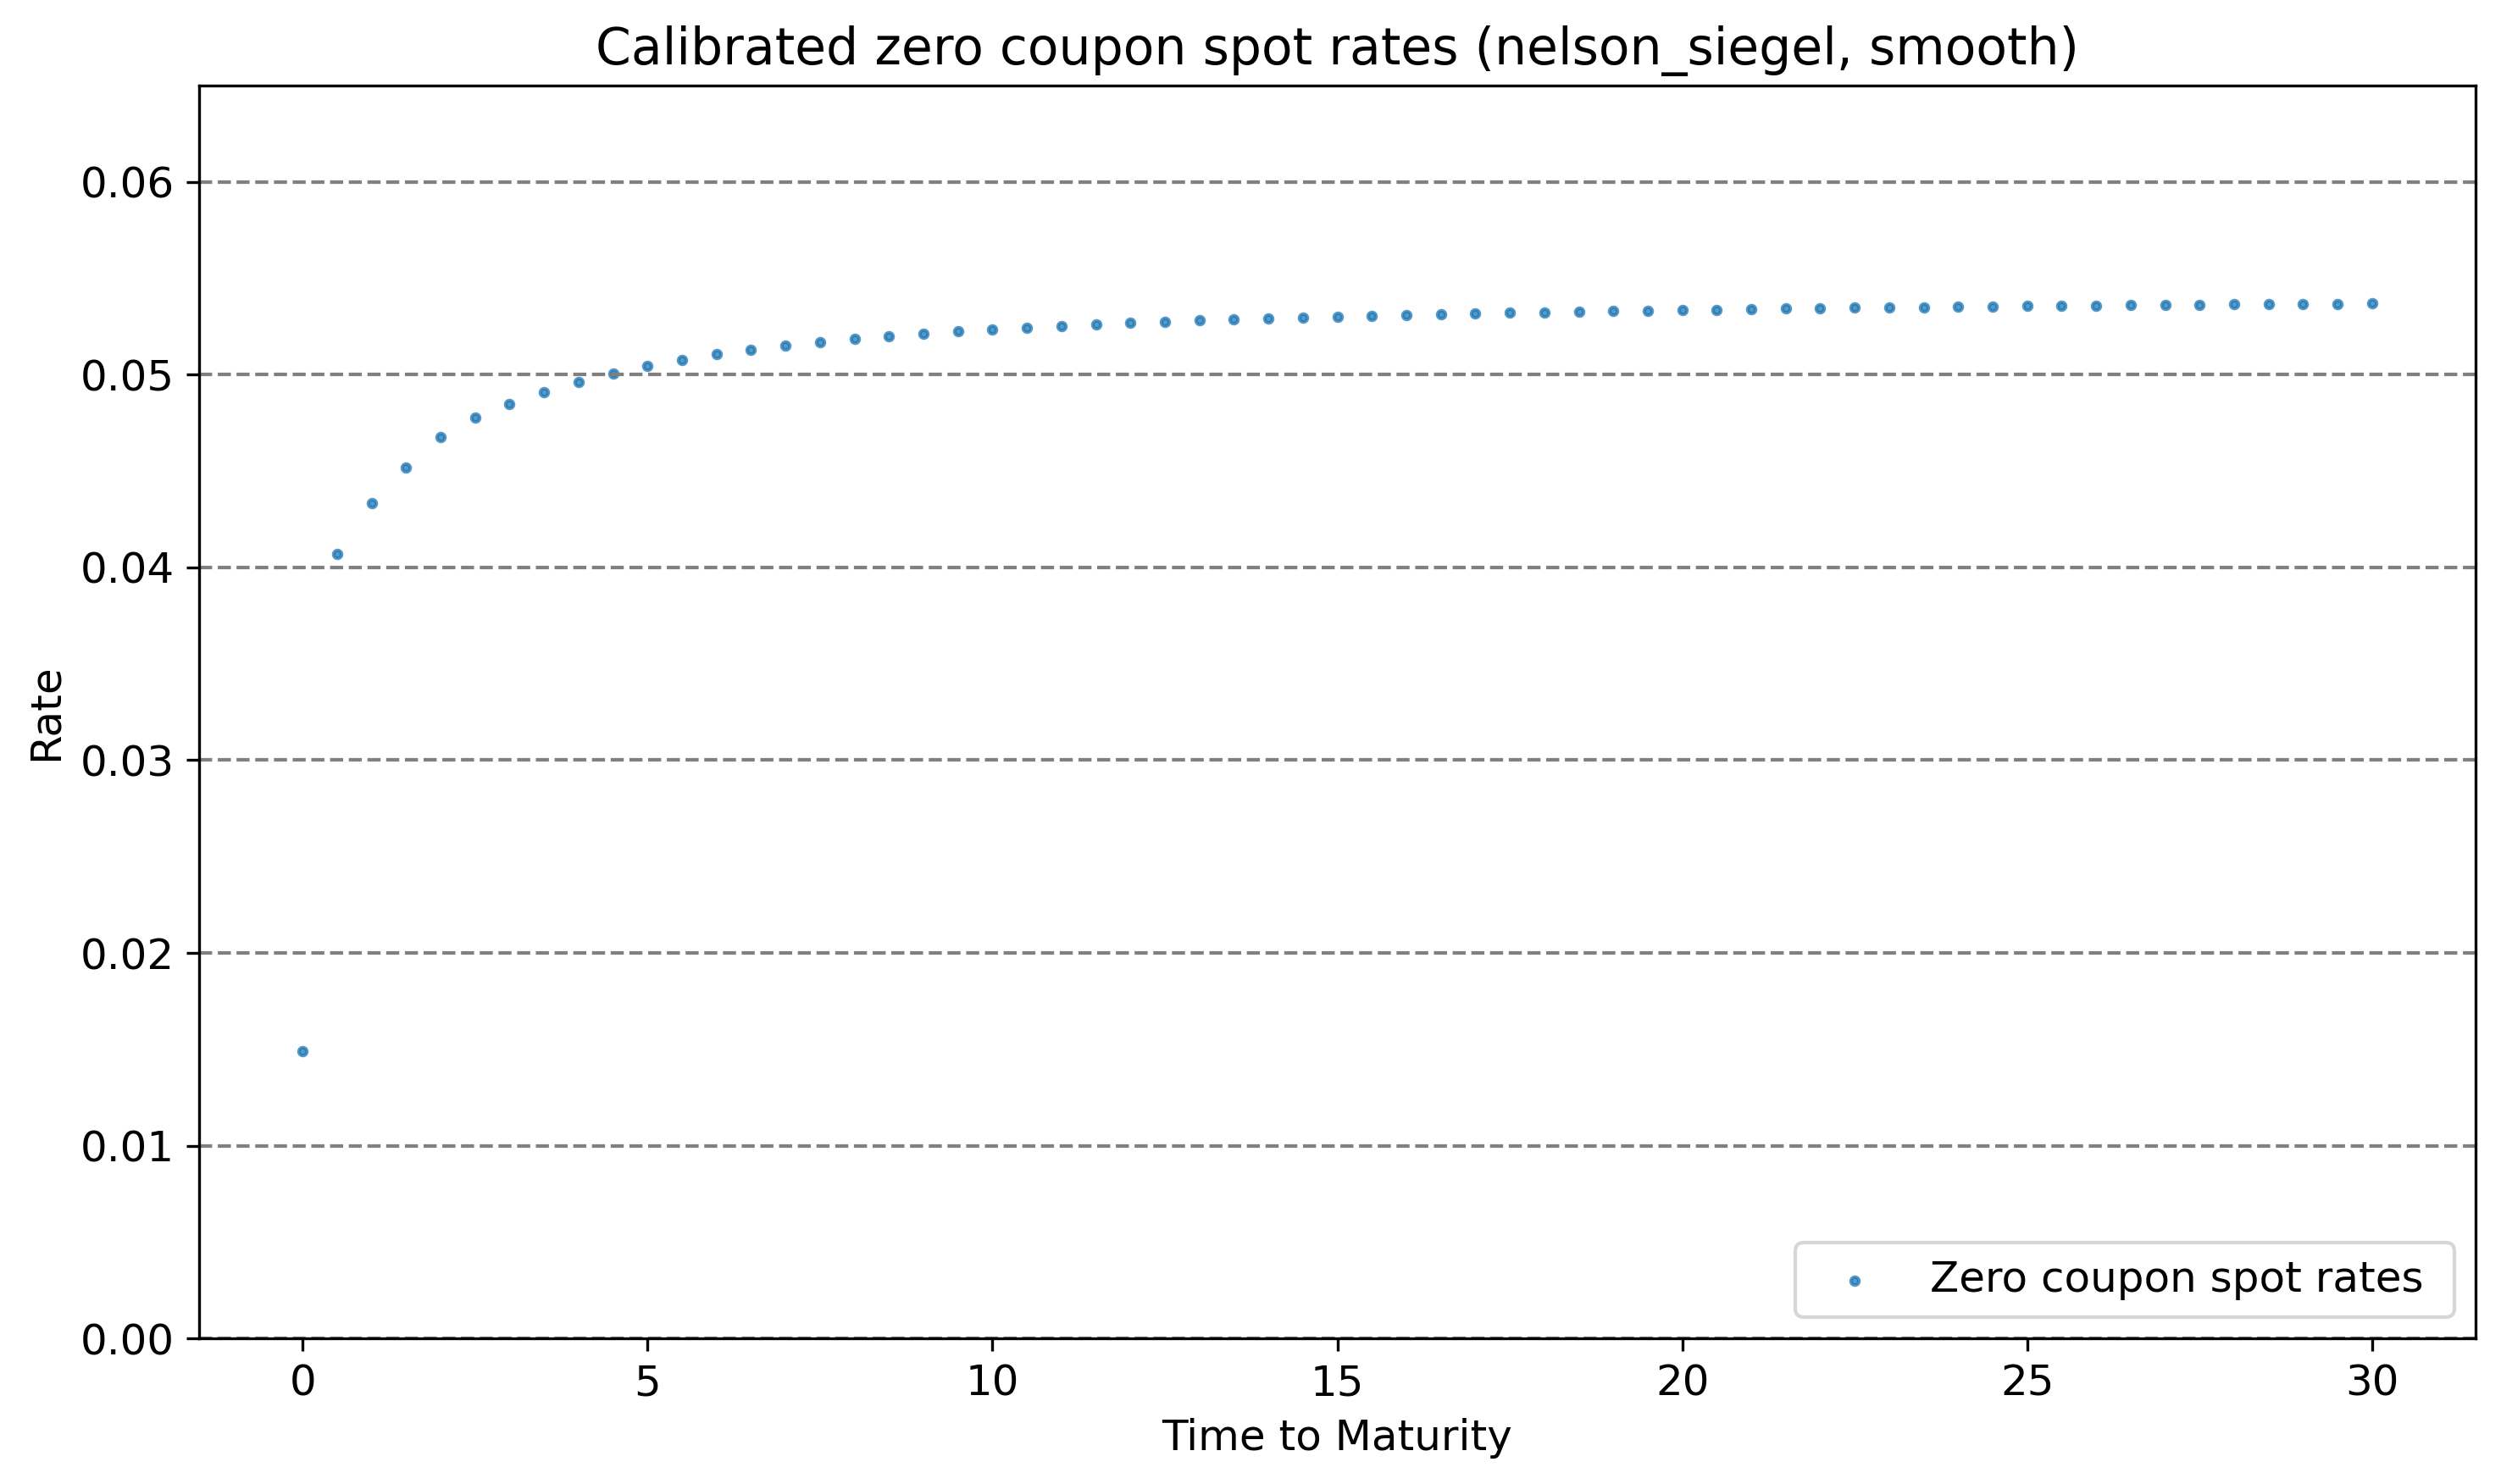

Zero coupon spot rates for selected maturities:
0.5:  0.04068
1.0:  0.04332
2.0:  0.04678
3.0:  0.04848
5.0:  0.05046
7.0:  0.05150
10.0:  0.05235
15.0:  0.05302
20.0:  0.05335
30.0:  0.05369


In [56]:
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate":0.04110}]
fra_market = [{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.04358},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.04423},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.04484},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.04542},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.04597},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.04649},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.04698},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.04743},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.04787}] 
swap_market = [{"id": 10,"instrument": "swap","maturity": 2, "rate": 0.04723, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate": 0.04891, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate": 0.05004, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate": 0.05084, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate": 0.05184, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.05263, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.05325, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.05354, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.05382, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market # using the data from the solution as the table is wrong
interpolation_options = {"method":"nelson_siegel","transition": 'smooth'}
T_fit, R_fit = fid.zcb_curve_fit(data,interpolation_options=interpolation_options)
T_inter = np.linspace(0, 30, 2*int(T_fit[-1])+1)
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter=T_inter, T=T_fit, R=R_fit, interpolation_options=interpolation_options)
fit = [{'label':'Zero coupon spot rates', 'x':T_inter, 'y':R_inter},]
plot.rates(fit,title=f'Calibrated zero coupon spot rates ({interpolation_options["method"]}, {interpolation_options["transition"]})')
T_report = np.array([0.5, 1, 2, 3, 5, 7, 10, 15, 20, 30])
R_report = np.zeros(len(T_report))
print('Zero coupon spot rates for selected maturities:')
for i, t in enumerate(T_report):
    R_report[i] = fid.find_value_return_value(t, T_inter, R_inter, precision=1e-8)[1][0][1]
    print(f'{T_report[i]:.1f}:  {R_report[i]:.5f}')

#### b)


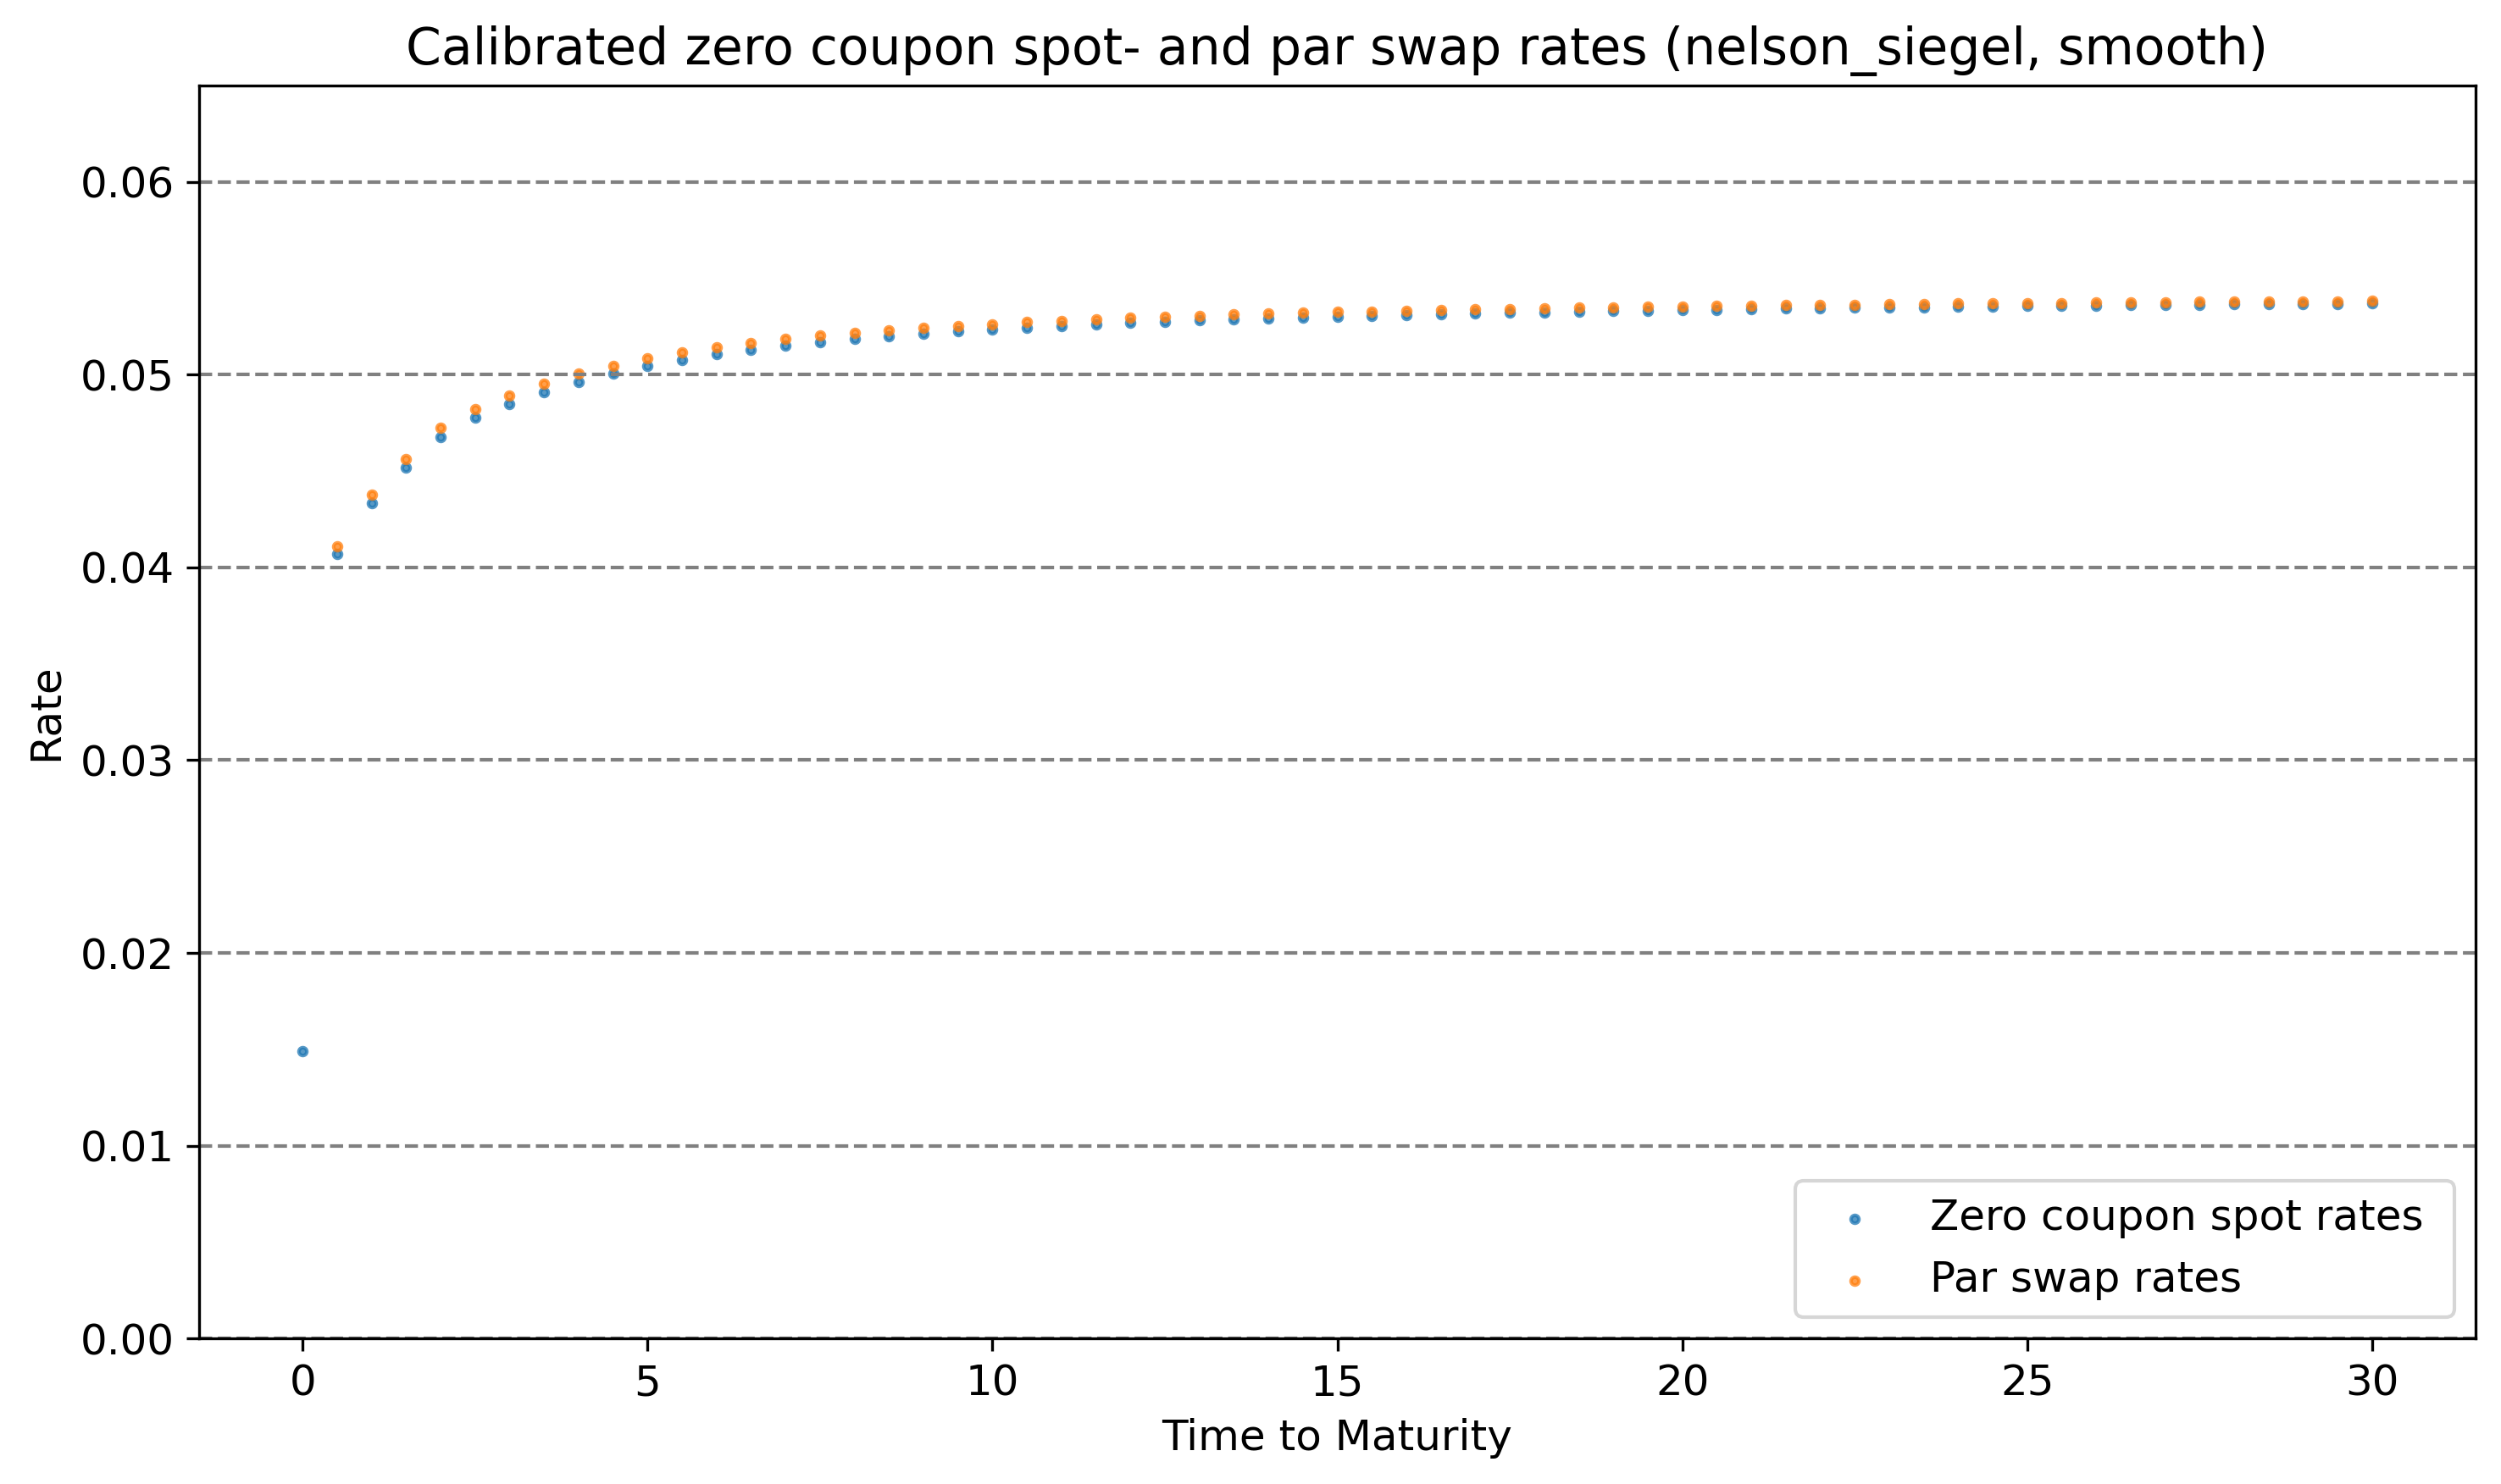

In [57]:
T_swap = np.linspace(0.5, 30, 2*int(T_fit[-1])) # just using the semiannual dates 
R_swap, S_swap = np.zeros([len(T_swap)]), np.zeros([len(T_swap)])
for i, maturity in enumerate(T_swap):
    R_swap[i], S_swap[i] = fid.swap_rate_from_zcb_prices(0,0,T_swap[i],"semiannual",T_inter,p_inter)
fit.append({'label':'Par swap rates', 'x':T_swap, 'y':R_swap})
plot.rates(fit,title=f'Calibrated zero coupon spot- and par swap rates ({interpolation_options["method"]}, {interpolation_options["transition"]})')

#### c)

In [60]:
T_pos, R_pos = 6, 0.047
R_swap_pos, S_swap_pos = fid.swap_rate_from_zcb_prices(0,0,T_pos,"semiannual",T_inter,p_inter) # finding the swap rate for the position today #(time now, time start, time end, fixed freq, maturities for zcb, zcb prices)
PnL = (R_pos-R_swap_pos)*S_swap_pos
print(f"6Y par swap rate: {R_swap_pos}, S_swap: {S_swap_pos},\nPnL of position in 7Y payer swap after one year: {10000*PnL} in bps.")

6Y par swap rate: 0.051411581803484915, S_swap: 5.132252333038784,
PnL of position in 7Y payer swap after one year: -226.41351003326906 in bps.


We see that the PnL is $\sim -226.41$ bps hence my colleague has lost money on the trade. This indicates that the rates a year ago were lower than the current rates. We also see this as the $6Y$ par swap rate is $\approx 44$ bps higher than the rate he entered into the $7Y$ swap a year ago.

### Problem 3
#### a)

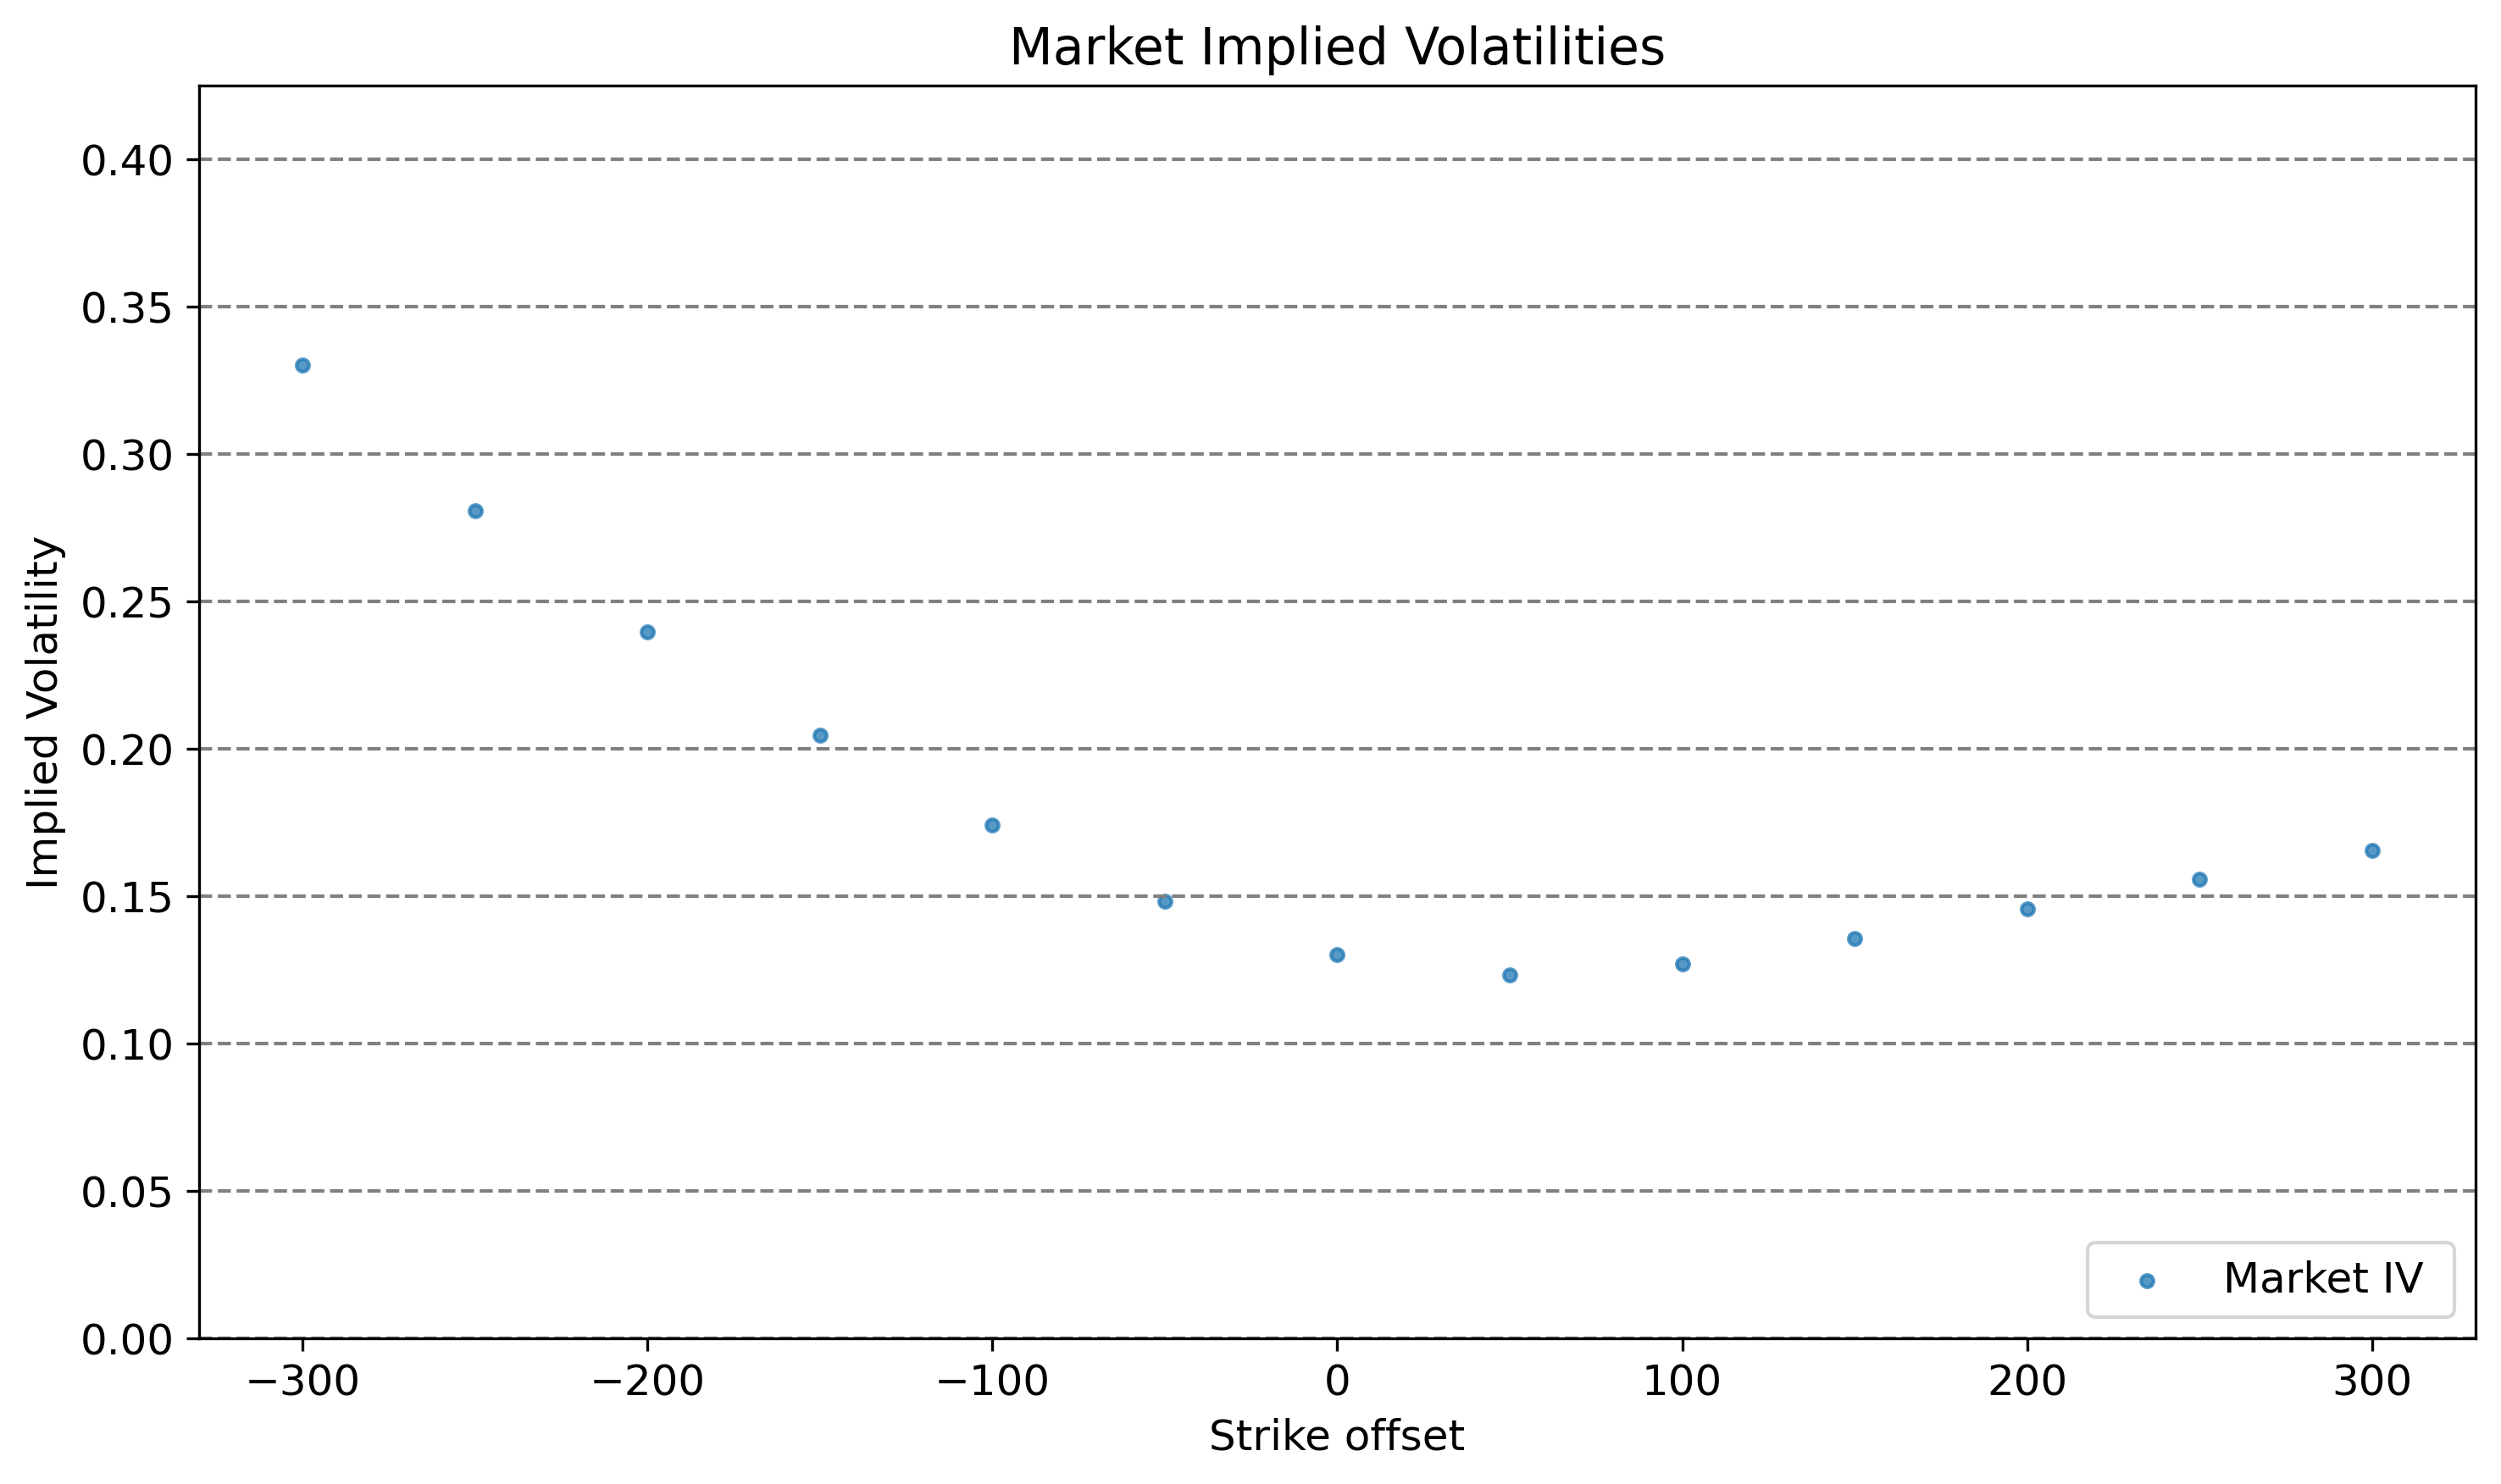

2Y4Y forward par swap rate: 0.0487002882976103, accrual factor: 4.0717299
market implied volatility: 
[0.33016846 0.28077569 0.23968775 0.20458945 0.17408927 0.14835745
 0.13008727 0.12324459 0.12694436 0.13557497 0.14565898 0.155831
 0.16548454]


In [105]:
M = 15
offsets = 13
idx_exercise, idx_maturity = 4, 14
K_offset = np.linspace(-300,300,offsets)
T = np.linspace(0, 7, M)
p = np.array([1, 0.98314916, 0.96478677, 0.94539738, 0.92535353, 0.90493951, 0.88437071, 0.86380916, 0.84337571, 0.8231596, 0.80322594, 0.78362142, 0.76437872, 0.74551992, 0.72705911])
price_market = np.array([0.12256859, 0.10253932, 0.08273803, 0.0633625, 0.04480655, 0.02793572, 0.0145331, 0.00650867, 0.0030062, 0.00158778, 0.00094974, 0.00062285, 0.00043427])
R_swap, S_swap = fid.swap_rate_from_zcb_prices(0,2,7,'semiannual',T,p)
K, iv_market = np.zeros(offsets), np.zeros(offsets)
for i in range(offsets):
    K[i] = R_swap + K_offset[i]/10000
    iv_market[i] = fid.black_swaption_iv(price_market[i],T[idx_exercise],K[i],S_swap,R_swap,type = "call", iv0 = 0.25) # put because it is reciever swaption
iv_plot = [{'label':'Black IV','x':K_offset,'y':iv_market, 's':50}]
plot.rates(iv_plot, title='Black Implied Volatilities', xlabel='Strike offset', ylabel='Implied Volatility', yrange=[0,0.425])
print(f"2Y4Y forward par swap rate: {R_swap}, accrual factor: {S_swap}")
print(f'Black implied volatility: \n{iv_market}')

The $2Y5Y$ par swap rate is $0.0487$. From the Black implied volatilty we clearly see that there is a ’smirk’ in implied volatilities indicating that market prices are not equivalent to what would arise in a Black’s model. The pricing measure chosen by the market is not compatible with the 2Y 4Y forward par swap rate following a log-normal distribution. The distribution implied by the measure chosen by the market has more fat tails and displays more left skewness than that of a log-normal random variable. This is a finding that is very much consistent with typical market behavior

#### b)

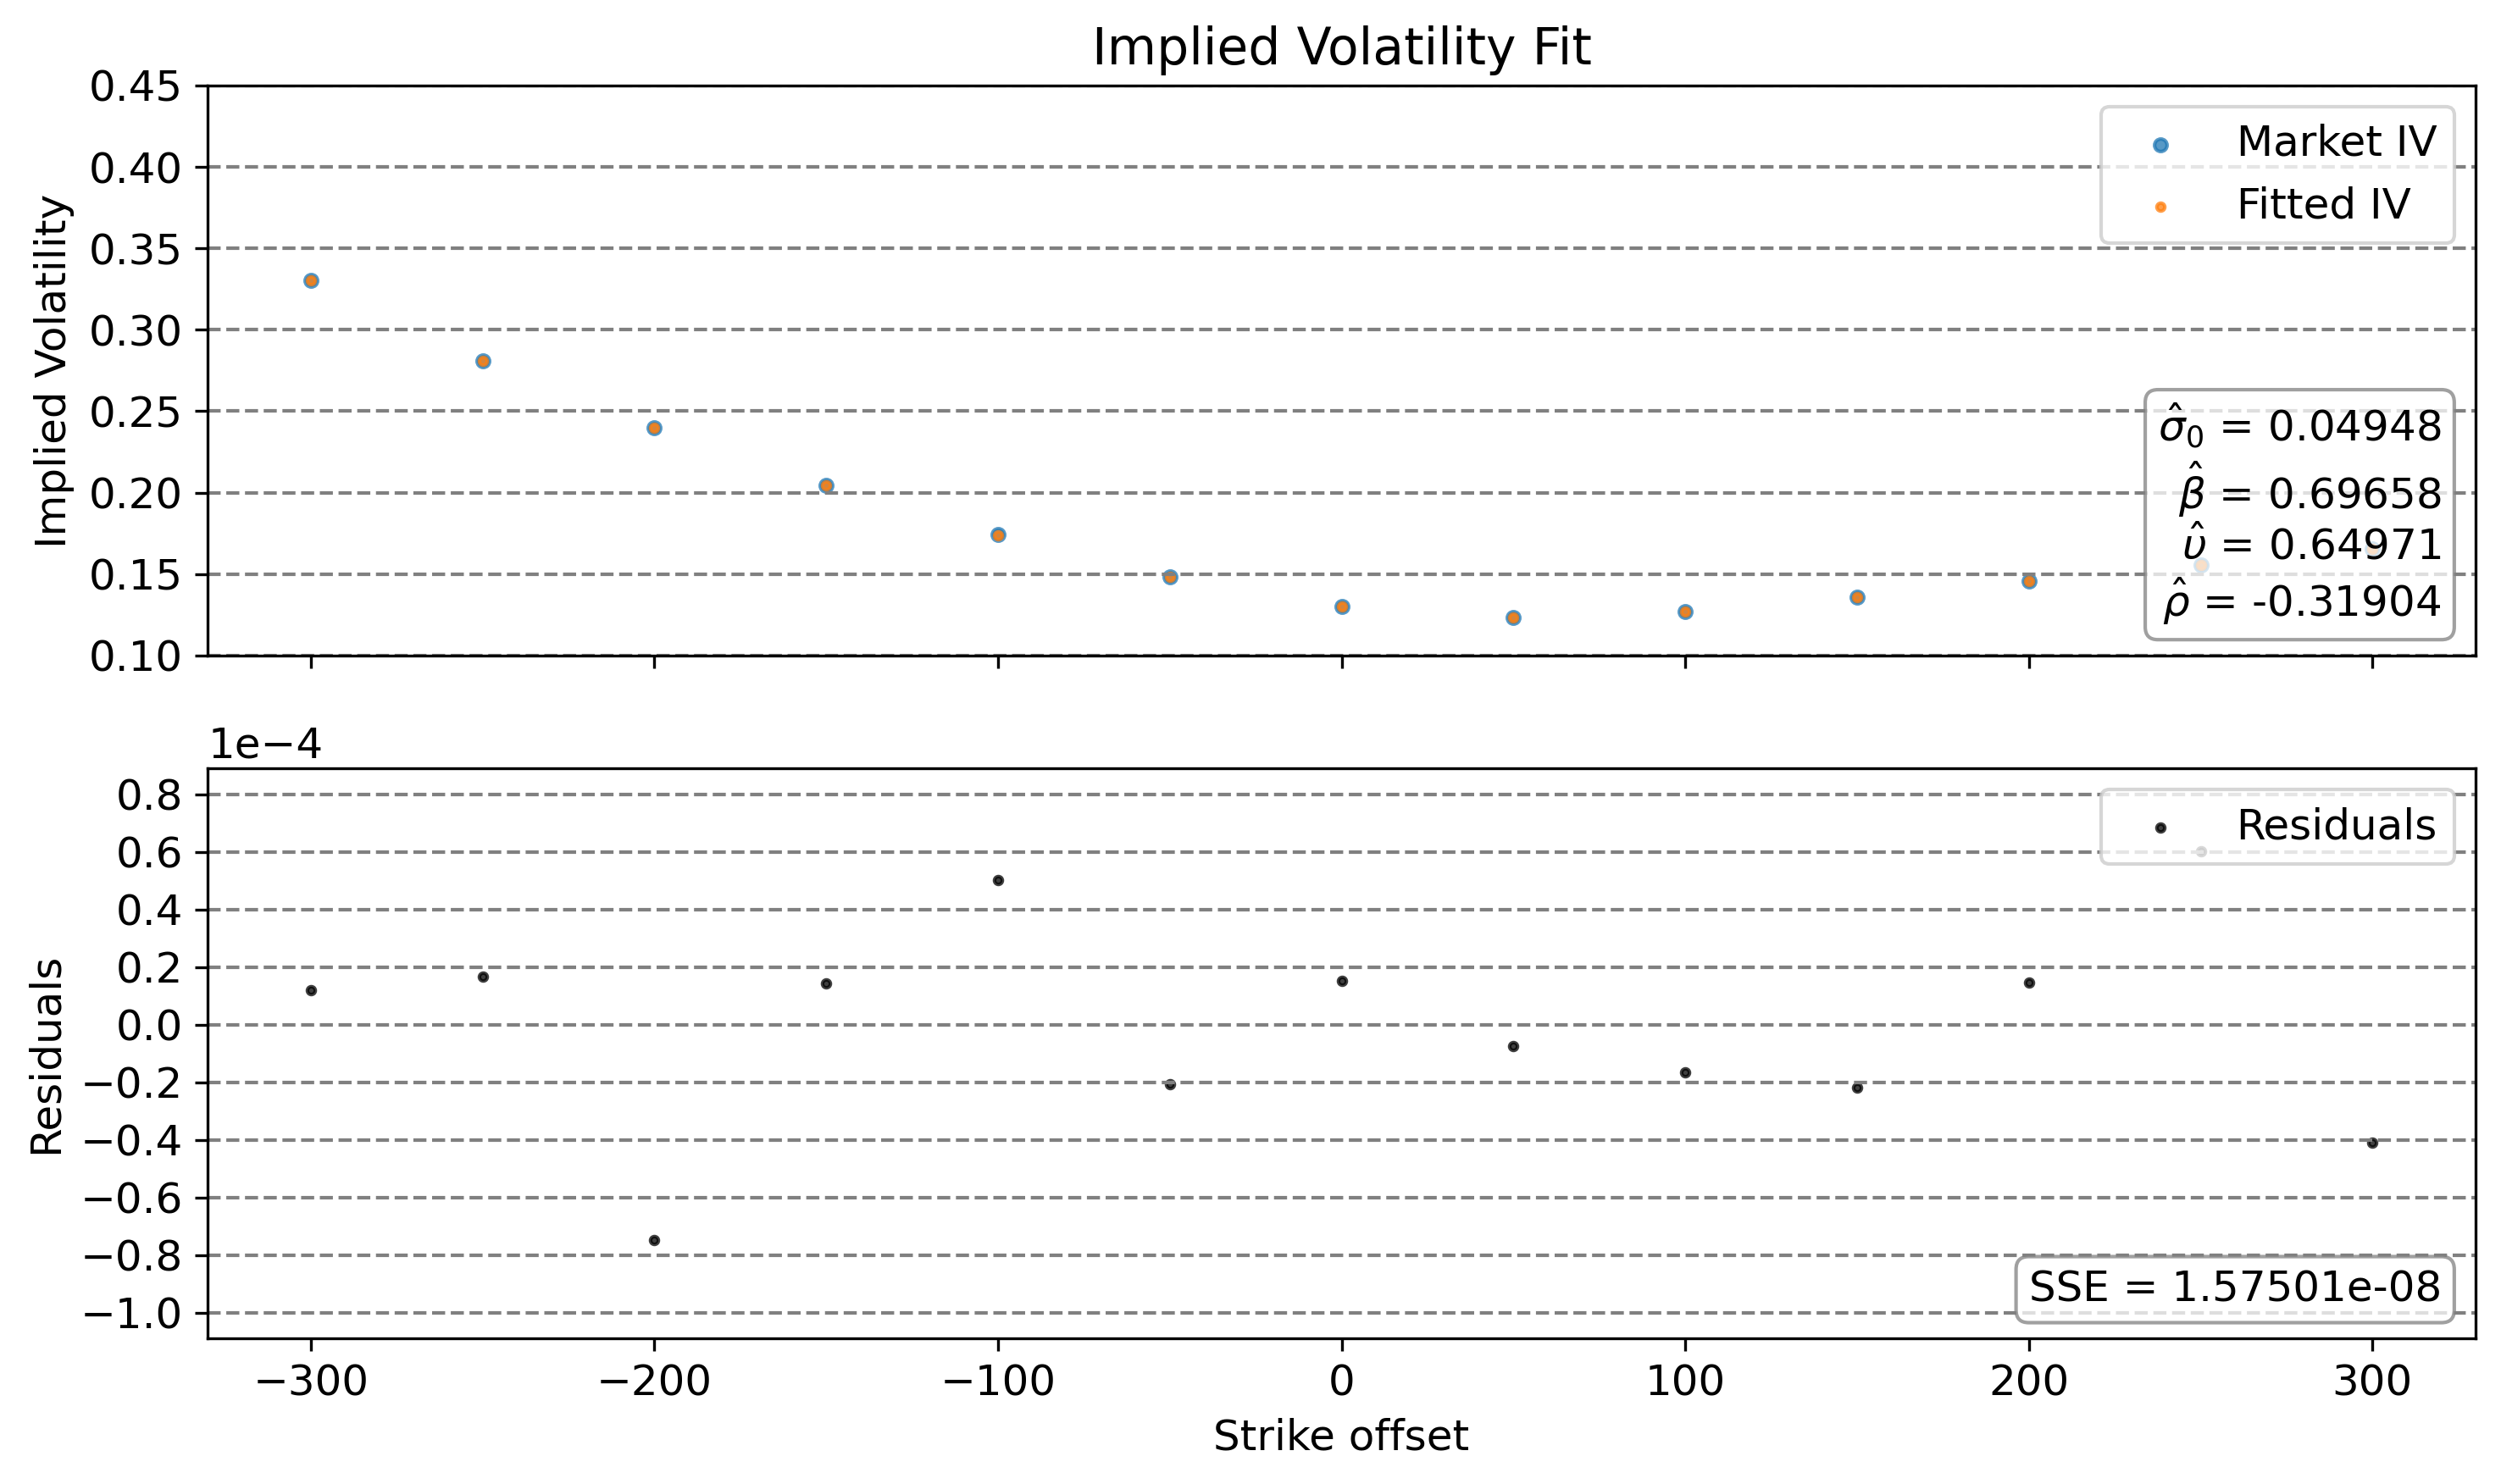

In [107]:
param0 = 0.06, 0.5, 0.45, -0.2
result = minimize(fid.fit_sabr_obj, param0, method = 'nelder-mead', args = (iv_market,K,T[idx_exercise],R_swap) ,options={'xatol': 1e-8,'disp': False})
sigma0, beta, upsilon, rho = result.x
iv_fit, price_fit = np.zeros(offsets), np.zeros(offsets)
for i in range(offsets):
    iv_fit[i] = fid.sigma_sabr(K[i],T[idx_exercise],R_swap,sigma0,beta,upsilon,rho,type = "call")
    price_fit[i] = fid.black_swaption_price(iv_fit[i],T[idx_exercise],K[i],S_swap,R_swap,type = "call")
iv_plot.append({'label':'Fitted IV','x':K_offset,'y':iv_fit})
res = [{'label':'Residuals','x':K_offset,'y':iv_market-iv_fit}]
text = {'$\hat{\sigma}_0$':sigma0,'$\hat{\\beta}$':beta,'$\hat{\\upsilon}$':upsilon,'$\hat{\\rho}$':rho}
text_res = {'SSE':result.fun}
plot.fit(iv_plot,res,'Implied Volatility Fit',xlabel='Strike offset', ylabel='Implied Volatility', text=text, text_res=text_res)

As seen above the fitted implied volatility from the SABR model perfectly matches the data with a residual SSE of $1.56\cdot 10^{-8}$

#### c)


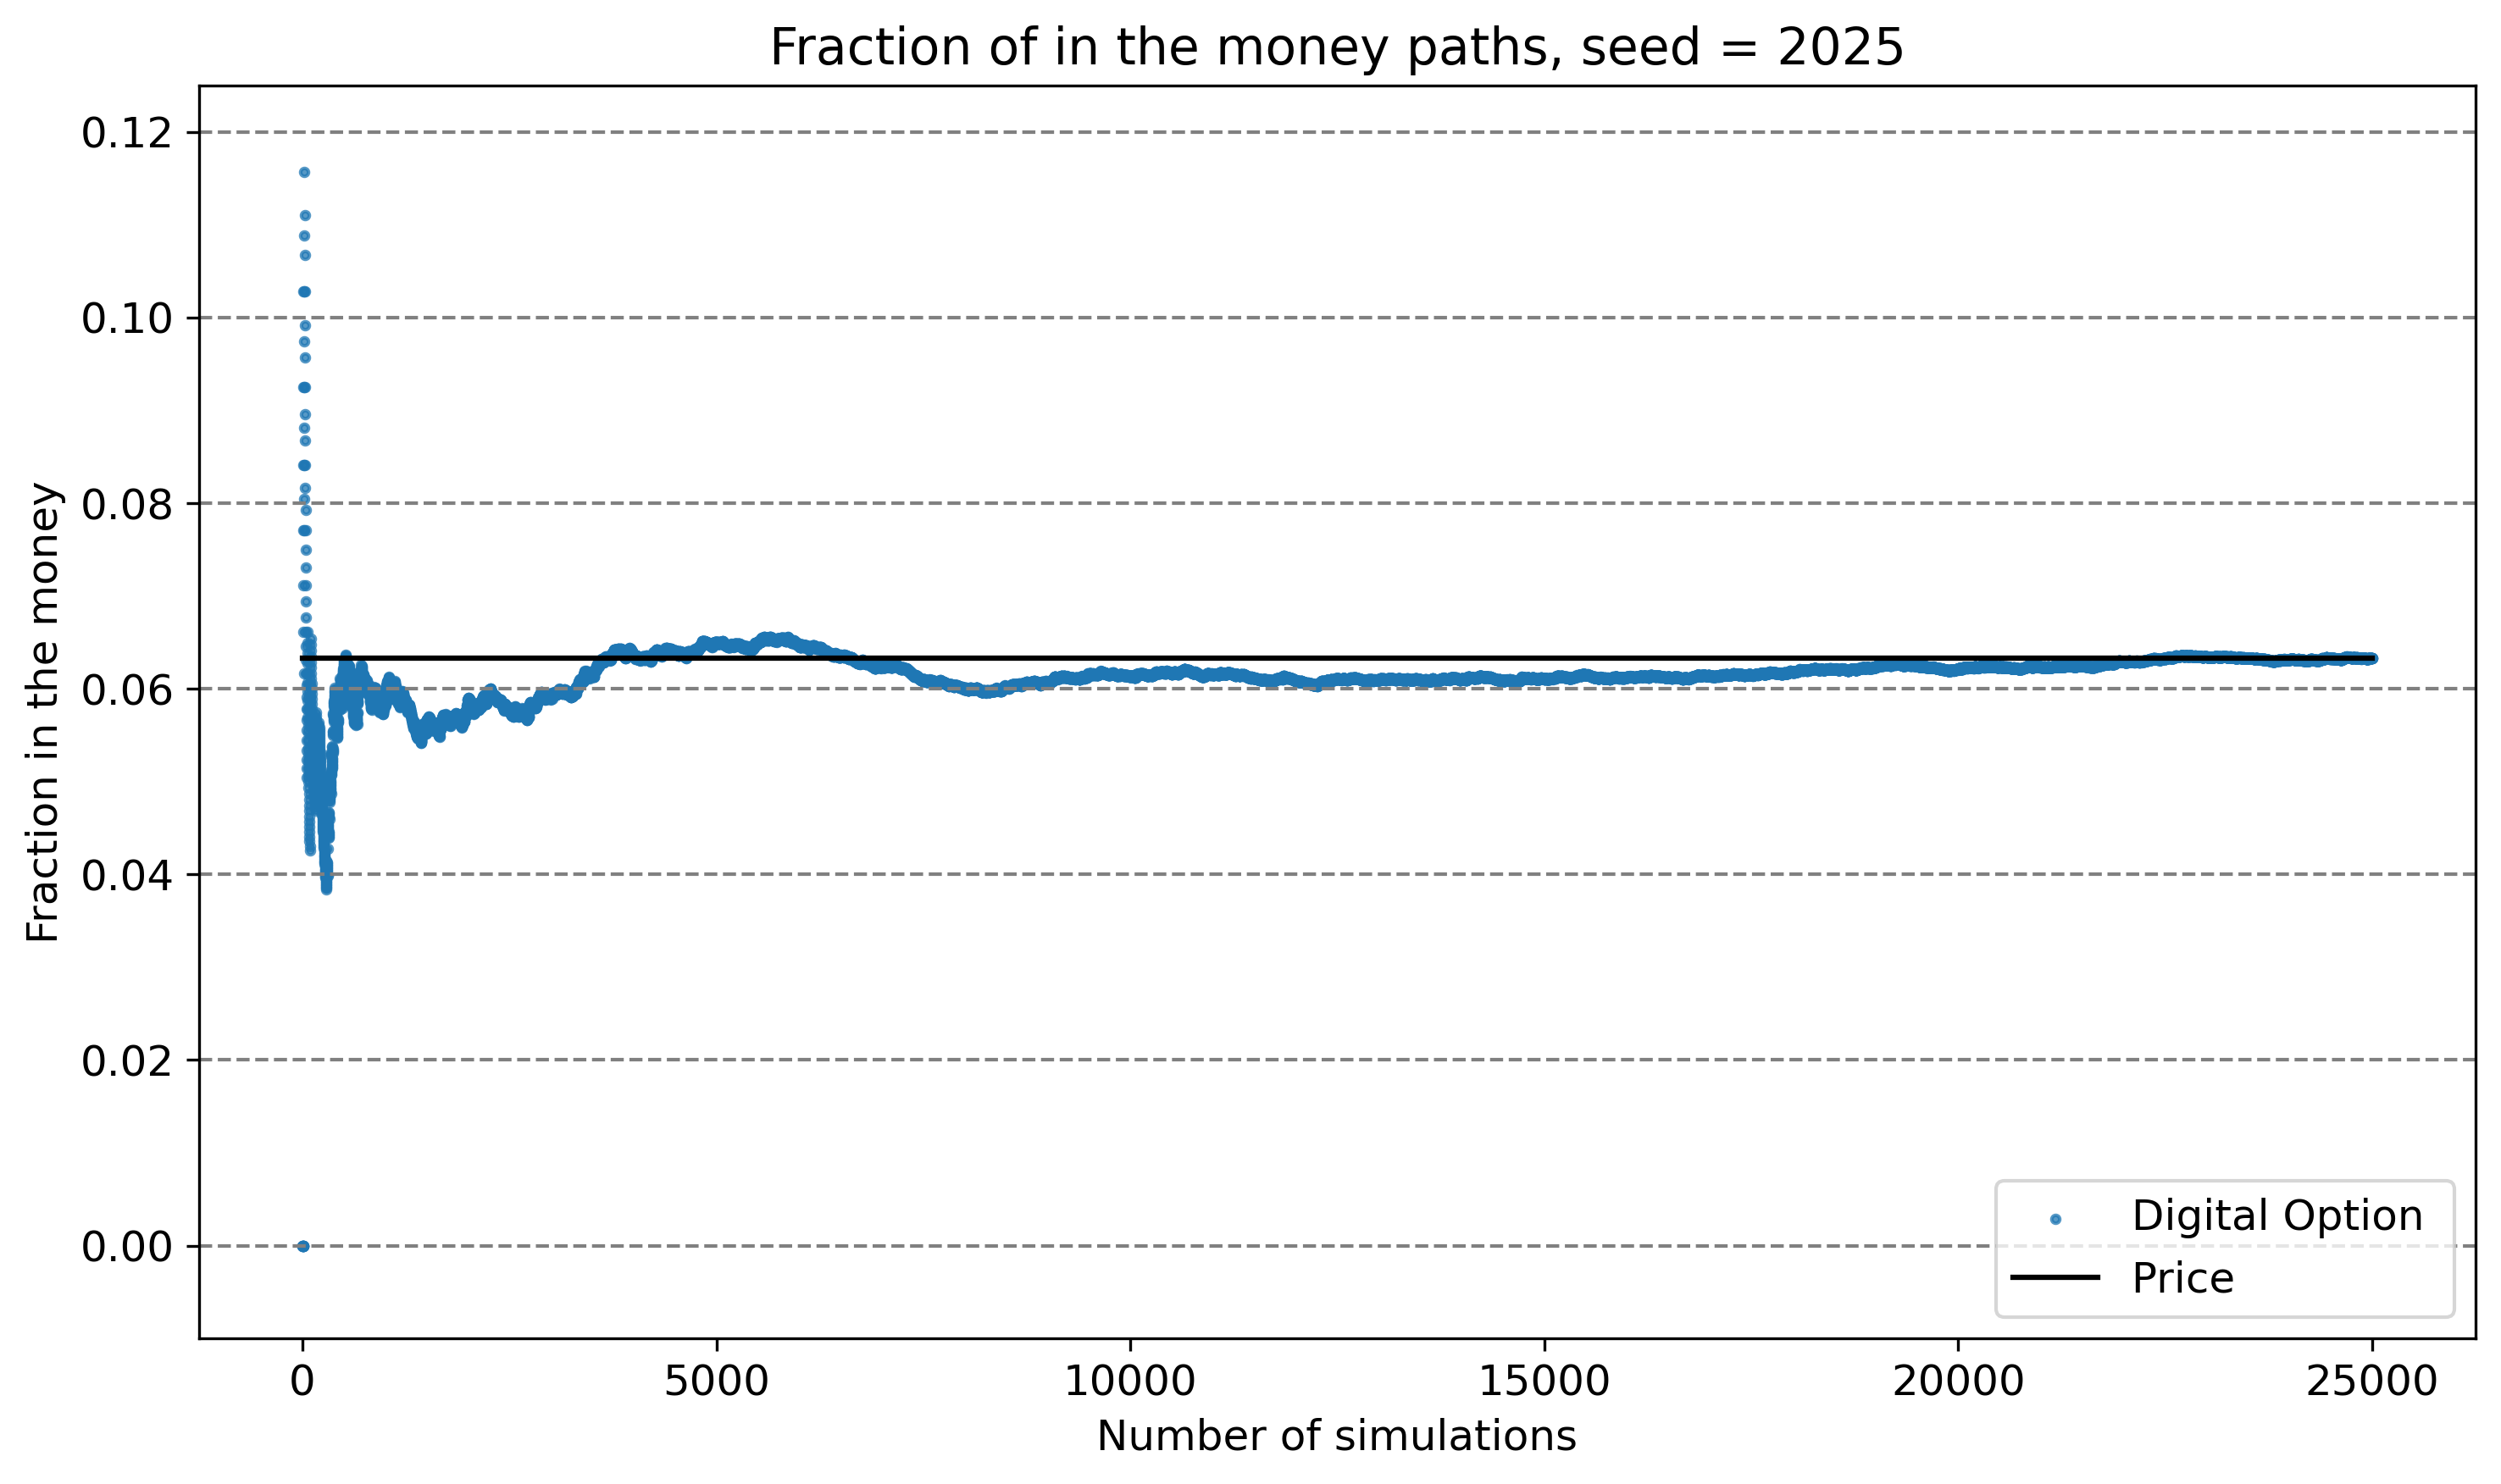

frac ITM: 0.0684, price = 0.063294181452


In [116]:
M_simul, N_simul = 2000, 25000
T_digital = 2
seed = 2025
strike = R_swap + 125/10000
F_simul_digital, sigma_simul_digital = np.zeros(M_simul), np.zeros(M_simul)
frac_ITM = np.zeros(N_simul) # as this is a digital option its fair value is the fraction of the paths that are in the money (and discounted)
np.random.seed(seed)
count = 0
for n in range(0,N_simul):
    F_simul_digital, sigma_simul_digital = fid.sabr_simul(R_swap, sigma0, beta, upsilon, rho, M_simul, T_digital)
    if F_simul_digital[-1] > strike:
        count += 1
    frac_ITM[n] = count/(n+1)
digi_plot = [{'label':'Digital Option','x':np.arange(1,N_simul+1),'y':p[4]*frac_ITM},
             {'label':'Price','x':np.array([1,N_simul]),'y':p[4]*frac_ITM[-1]*np.ones(2), 'type':'line', 'color':'black'}]
plot.rates(digi_plot, title=f'Fraction of in the money paths, seed = {seed}', xlabel='Number of simulations', ylabel='Fraction in the money')
print(f"frac ITM: {frac_ITM[-1]}, price = {p[4]*frac_ITM[-1]}")

I find the price of the digital option to be $\approx 0.63$ with 25000 simulations. 
The digital option will protect the client against rising interest rates but the pay-off of the digital option will be 1 no matter how far ITM the option is, so the client’s pay-off won’t be very high if interest rates rise sharply which, depending on his situation, could be a problem. The strategy that closest resembles a digital option with a strike 125 bps above the ATMF is to be long one maturity $K_{offset} = 100$ and short one $K_{offset} = 150$ swaption. The price of such
an instrument would be roughly $14$ bps.

### Problem 4
#### a)


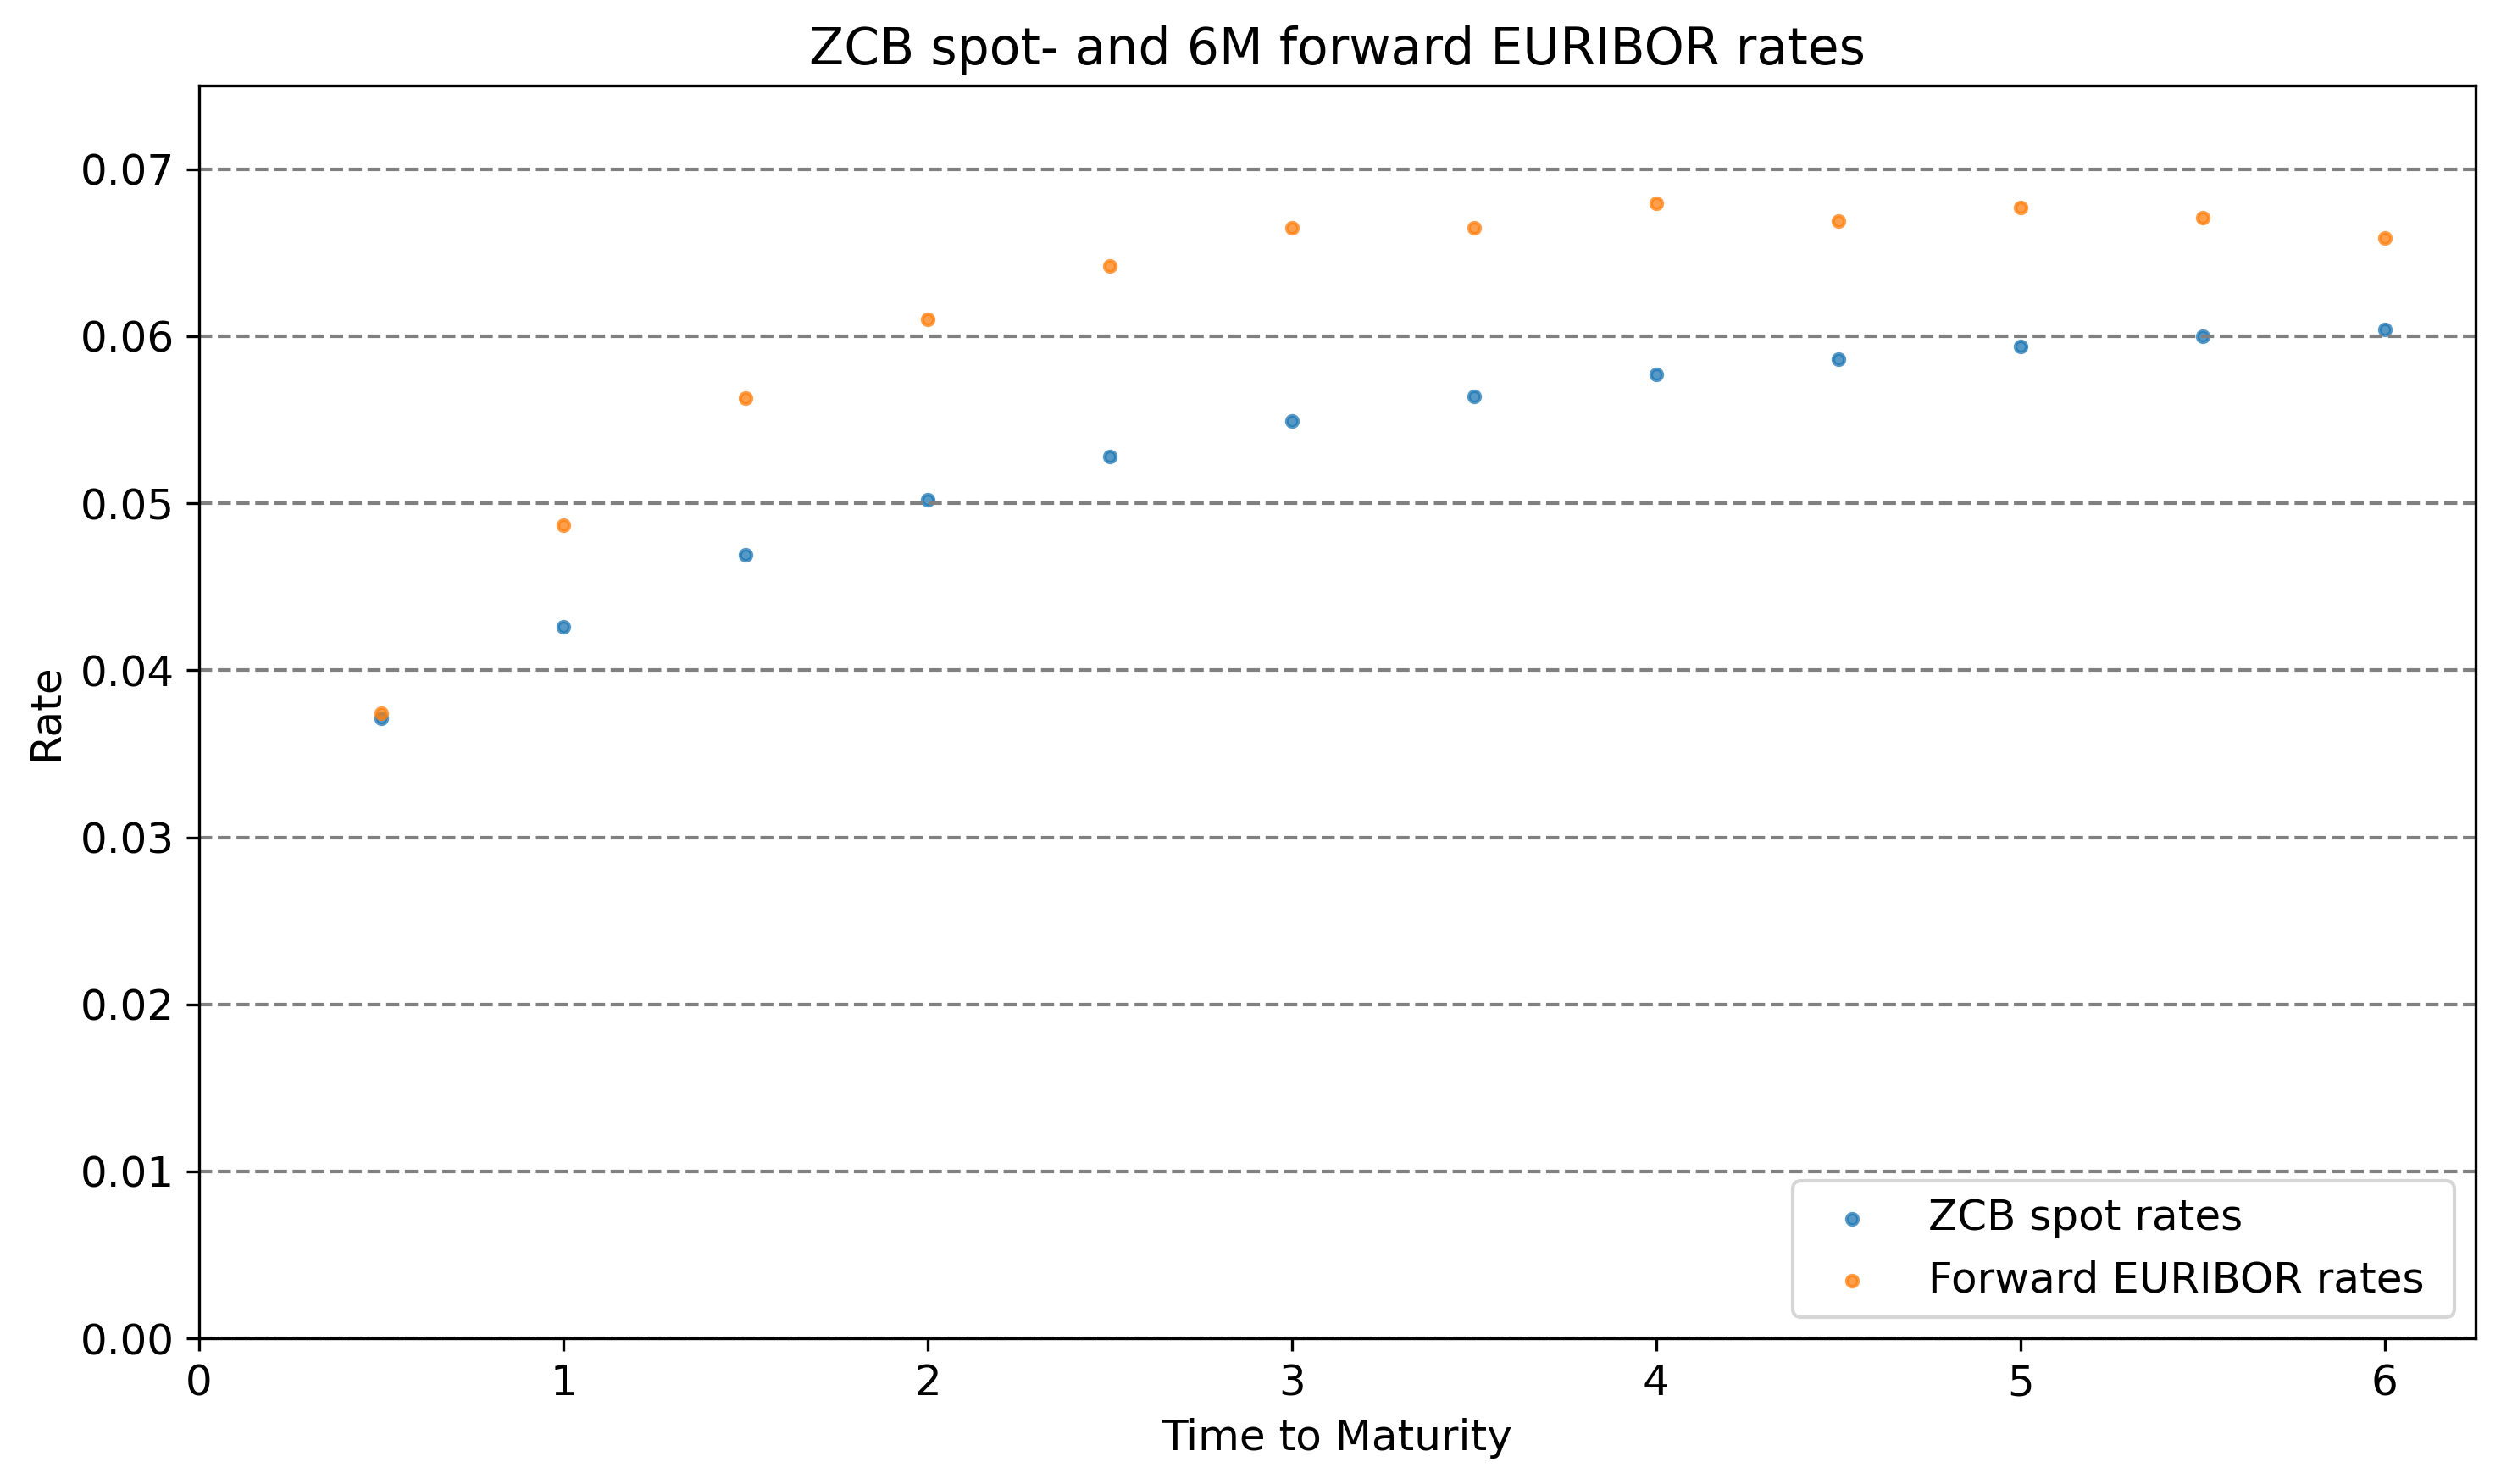

6M forward LIBOR:
[0.03744624 0.04868307 0.05627724 0.06101212 0.06420916 0.06648104
 0.06648104 0.06792808 0.06689438 0.0677213  0.06710108]


In [ ]:
M = 6*2+1
alpha = 0.5
T = np.linspace(0, 6, M)
spot_rate = np.array([np.nan, 0.0371, 0.0426, 0.0469, 0.0502, 0.0528, 0.0549, 0.0564, 0.0577, 0.0586, 0.0594, 0.0600, 0.0604])
sigma_cap = np.array([np.nan, np.nan, 0.182, 0.205, 0.229, 0.255, 0.283, 0.313, 0.347, 0.381, 0.423, 0.484, 0.545])
p = fid.zcb_prices_from_spot_rates(T,spot_rate)
L = fid.forward_libor_rates_from_zcb_prices(T,p)
rates_plot = [{'label':'ZCB spot rates', 'x':T[1:], 'y':spot_rate[1:],'s':40},
              {'label':'Forward EURIBOR rates', 'x':T[1:], 'y':L[1:],'s':40}]
plot.rates(rates_plot, title = 'ZCB spot- and 6M forward EURIBOR rates', xrange=[0,6.25])
print(f'6M forward LIBOR:\n{L[1:M-1]}')

The market is already pricing for rising interest rates and that will needless to say be reflected in the cost of protecting against such rising interest rates

#### b)

In [137]:
strike = 0.055
#3Y3Y swap with (NOT SWAPTION!)
R_swap, S_swap = fid.swap_rate_from_zcb_prices(0,3,6,alpha,T,p)
print(f"Fixed rate of a 3Y3Y forward payer swap: {R_swap}, Accrual factor: {S_swap}")
# buying interest cap to cap payments at 0.055
price_caplet = np.zeros(M)
for i in range(7,M):
    price_caplet[i] = fid.black_caplet_price(sigma_cap[i],T[i],strike,alpha,p[i],L[i],type = "call")
price_cap = sum(price_caplet)
S_cap = fid.accrual_factor_from_zcb_prices(0,0,6,alpha,T,p)
R_cap = price_cap/S_cap
print(f"upfront cost of cap: {price_cap:.5f}, premium twice a year: {alpha*R_cap*10000:.5f} bps")


Fixed rate of a 3Y3Y forward payer swap: 0.06701006014984932, Accrual factor: 2.270468037607327
upfront cost of cap: 0.06266, premium twice a year: 62.40267 bps


The fixed rate the client could get in 3 years using a $3Y3Y$ forwward swap is $0.0670$.
The desired caplet on the other hand would have the upfront price of $0.0603$ and the premium paid semi-annually for the next 6 years becomes roughly $62$ bps.

#### c)
i) Entering into the 3Y3Y forward interest eliminates all uncertainty about future interest rate payments but also comes with no upside should future interest rates be lower than feared. The other option of entering into an interest rate cap retains that upside but of course has the drawback that it, unlike the interest rate swap, comes at an upfront cost.

ii) Entering into an interest rate cap starting right now will insure that the interest payments will never rise above 0.05 so this limits the downside to the client at all future points in time. Also, there is a potential for upside in that the investor will benefit from low future interest rates. The strategy however comes at the cost that the investor will have to pay the premium of roughly 50 bp twice a year regardless of whether the cap comes into effect or not.